###### 6_cnn_practice.ipynb

## CNN (Convolutional Neural Network)
- 이미지의 공간적 구조(2D)를 그대로 사용해 특징을 추출하는 신경망
- Convolution(합성곱)과 Pooling(풀링)을 통해 지역 패턴을 감지
- MLP와 달리 이미지를 1차원으로 펼치지 않고 2D 형식 그대로 입력
- 이미지 분류에서 높은 성능을 보이는 대표적인 모델
- 작업 순서
  - Conv2D -> MaxPooling -> Flatten -> Dense 순서

Epoch 1/3


c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9365 - loss: 0.2278 - val_accuracy: 0.9742 - val_loss: 0.0841
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9816 - loss: 0.0596 - val_accuracy: 0.9856 - val_loss: 0.0500
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9869 - loss: 0.0408 - val_accuracy: 0.9861 - val_loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0384
 결과 :: loss - 0.0384 , accuracy - 0.9875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Text(0.5, 1.0, ' Predicted.... 7 ')

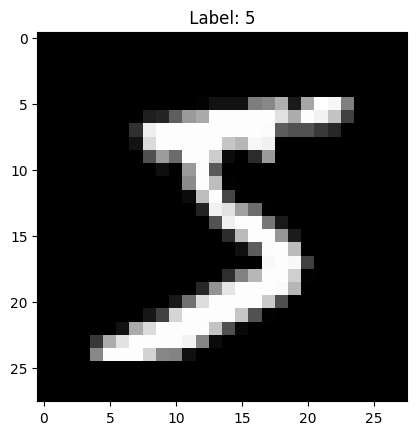

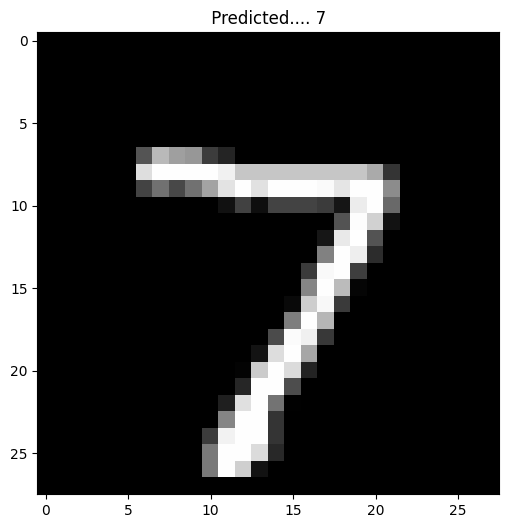

In [7]:
# MNIST 데이터 사용
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# * 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# * 전처리
#   - CNN은 4차원 형태로 입력 받음 (batch, height, width, channel)
#   - mnist => (28, 28) 흑백 이미지. channel = 1
#   - 정규화 (0~1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

#   - 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ----- * 입력 데이터 시각화 * -----
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f' Label: {np.argmax(y_train[0])} ')
# ----------------------------------

# * 모델 정의 (CNN)
model = Sequential([
  Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(64, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),

  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
# Conv2D(filters, kernel_size, activation, input_shape) => 이미지에서 특징 찾기!
# : 여러 개의 필터를 사용해 이미지의 특징(모서리, 선, 패턴 등)을 추출하는 층
# - filters : 사용할 필터(커널) 개수 (많을 수록 더 다양한 특징을 학습)
# - kernel_size : 필터 크기 (ex. (3,3) -> 3x3 크기의 필터)

# MaxPooling2D(pool_size) => 크기를 줄이고 중요한 특징만 남기기!
# : 이미지의 해상도를 줄여 계산량을 감소시키고, 중요한 특징만 남기는 단계
# - pool_size : 줄일 영역의 크기


# * 컴파일
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# * 학습 (반복:3, 학습데이터수:128, 검증데이터 20%)
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

# * 평가
loss, acc = model.evaluate(x_test, y_test)
print(f' 결과 :: loss - {loss:.4f} , accuracy - {acc:.4f}')

# ----- 예측 값 시각화 -----
sample_data = x_test[0].reshape(1, 28, 28, 1)
pred = model.predict(sample_data)

plt.figure(figsize=(8,6))
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f' Predicted.... {np.argmax(pred)} ')